# Abstract

Detect four shapes and test the CNN model accuracy.

Core tasks of **Convolution Neural Networks** are

1. Apply a set of weights on filters/patches to extract **local features**
2. Use **multiple filters** to extract different features
3. **Spatially share** parameters of each filter

CNN is named so because the core of it is **"The Convolution Operation"**. (Add weight ->Filter -> Extract feature - >Slide ->Repeat until all of the pixels are covered)

## CNN for classification

😎 

Main actions to be done for achieving the goal
1. Feature Learning
2. Classification

## Feature Learning

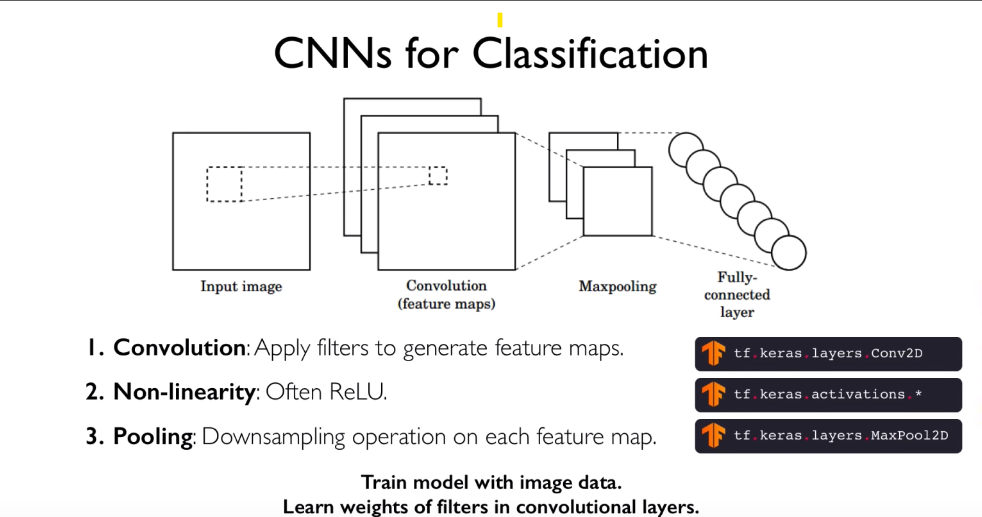

Non-linearity helps us with non-linear data. And helps us introduce complexity in the pipeline.

Pooling helps with scaled image. Deals with multiple scales of the image

### CNN layer- Local Connectivity 

1. Apply layer of weighted filter
2. Compute linear combinations
3. Activate non-linear functions

### CNN layer- Spatial information

1. Layer Dimensions: has height * width * depth
    * height and width are spatial dimensions. Also, kernels
    * depth: number of filters
2. Stride: How many units you want the filter to slide, aka. filter step size
3. Receptive field: Location in image where node path is connected to

This has to be set by humans.

### Non-linearity

* Applied after convolution operations. This is usally called **activation function**
* One method to do non-linearity is **ReLU** which is **Rectified Linear Unit**. What this does is pixel-by-pixel it replaces negative values by zero.
  That is it bascially does  a non-linear operation. Anything lesser than a given threshold, basically all values below a selected minimum are replaced as 
   zeros. And all maximum are kept the same.


### Pooling
* Helps to deal with spatial resolution of the image.
* One method to do this is Max pooling: it takes maximum value in a patch. eg: if image has 

|||||
|------|------|------|------|
|1  |1  |2  | 4 |
|5  |6  |7  | 8 |
|3  |2  |6  | 8 |
|7  |2  |3  | 0 |


and if we apply a 2x2 filter, then it selects 6 (Among 1,1,5,6) as the highest in first filter iteration. And then we slide, and In second, it would select highest of (2,4,7,8). And, so on.

### Layering Conv operations, local non-linearity, and pooling we can get hierarchy of features and detect them better.

### To summarize, CNN classification has two important steps
### 1. Feature Learning: Convolution operation + ReLU + Pooling
### 2. Classification: Flatten, Fully Connected, SoftMax

## Classification

We take the **high-level features of input** as ***output*** at the end of feature learning. And we take that output and **flatten** it out. Make it simple 1D and make them all **fully connected layer**. This fully connected layer is used for classification of input images. **Softmax** is the function that gets the output, which is the **probability of image belonging to a particular class**. 

## Let's begin.

To install tensorflow

!pip install tensorflow==2.0.0.rc0

!pip install tensorflow-gpu==2.0.0.rc0

!pip install mlxtend==0.17.0

### Imports

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import os

In [2]:
print(tf.__version__)

2.0.0-rc0


In [3]:
# For solving computer vision problems
import cv2

## Data Exploration

In [4]:
# Load dataset
PATH = 'four-shapes\shapes'
img_size = 64
shapes = ['circle', 'square','star', 'triangle']
labels = []
dataset = []

In [5]:
# Get data from folder

for shape in shapes:
    print('Getting Data for :', shape)
    for img in os.listdir(os.path.join(PATH, shape)):
        
        #Returns image that is loaded from a specified file. Parameters: path, flag.
            #To read colored image: flag=cv2.IMREAD_COLOR. or 1
            #To read grayscale image: flag= cv2.IMREAD_GRAYSCALE or 0
            #To read anyother image: flag= cv2.IMREAD_UNCHANGED or -1
        image = cv2.imread(os.path.join(PATH,shape,img), cv2.IMREAD_GRAYSCALE)
        #Helps with image resizing. Reduces number of pixels from an image. Here, it is resized to 64 x 64
        image = cv2.resize(image,(img_size,img_size))
        dataset.append(image)
        #Add Label list
        labels.append(shapes.index(shape))

print('\nDataset Size :', len(dataset))
print('Image Shape :', dataset[0].shape)
print('Label size :', len(labels))        

Getting Data for : circle
Getting Data for : square
Getting Data for : star
Getting Data for : triangle

Dataset Size : 14970
Image Shape : (64, 64)
Label size : 14970


In [6]:
print('Count of Circle Images :', labels.count(shapes.index('circle')))
print('Count of Square Images :', labels.count(shapes.index('square')))
print('Count of Star Images :', labels.count(shapes.index('star')))
print('Count of Triangle Images :', labels.count(shapes.index('triangle')))

Count of Circle Images : 3720
Count of Square Images : 3765
Count of Star Images : 3765
Count of Triangle Images : 3720


In [7]:
print(len(dataset))
print((dataset[1].shape))

14970
(64, 64)


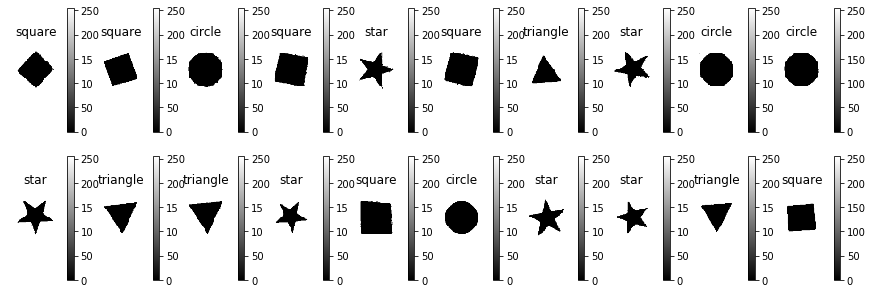

In [8]:
#View Random Images from dataset
index = np.random.randint(0, len(dataset), size = 20)

plt.figure(figsize = (15,5))
for i, ind in enumerate(index,1):
    img = dataset[ind]
    lab = labels[ind]
    plt.subplot(2,10,i)
    plt.title(shapes[lab])
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')
    plt.colorbar()

In [9]:
dataset_np = np.array(dataset).reshape(-1, 64, 64, 1)
dataset_np.shape

(14970, 64, 64, 1)

In [10]:
#Normalization Image: to train with tensorflow.
dataset_np = dataset_np.astype('float32')/255.0
dataset_np

array([[[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]]],


       [[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
 

## Test and Train split

In [11]:
from sklearn.model_selection import train_test_split

#Split train and test set
X_train, X_test, y_train, y_test = train_test_split(dataset_np, labels, test_size = 0.2, random_state = 42)

print("Number of image, size, size, depth of image ( 1-BW, 3- RGB)")
print('X_train size is :', X_train.shape)
print('X_test size is :', X_test.shape)
print('y_train size is :', len(y_train))
print('y_test size is :', len(y_test))

y_train= np.array(y_train)
y_test=np.array(y_test)

Number of image, size, size, depth of image ( 1-BW, 3- RGB)
X_train size is : (11976, 64, 64, 1)
X_test size is : (2994, 64, 64, 1)
y_train size is : 11976
y_test size is : 2994


In [12]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  4
Output classes :  [0 1 2 3]


In [13]:
np.mean(X_train)

0.8088519

In [14]:
np.max(X_train)

1.0

In [15]:
np.min(X_train)

0.0

In [16]:
np.max(y_train)

3

In [17]:
np.min(y_train)

0

y_train have four labels: 0,1,2,3. 
* 0: Circle
* 1: Square
* 2: Star
* 3: Triangle

# Part A - Deep Learning model


* Create a Deep learning Model
* Apply a Deep Learning model to your data. Validate the accuracy on out of sample data.
* The Deep Learning model can be a CNN, RNN, Autoencoder, Variational autoencoder (VAE), Restricted Boltzmann machine (RBM), Deep belief network (DBN) or Generative Model. It cannot be a simple multilayer perceptron (MLP).

Basic building blocks of any neural network is neural layers. Layers extracts features from the input and feeds into the next layer/ hidden layers. And, then it starts training.

Model Life-cycle
1. Define the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Predict 

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

### Define model

Note:
* Padding is done to make sure spatial information is not lost. Eg: if it is 32 x 32 x 3 image and we apply three 5 x 5 x 3 filter then image is resized to 28 x 28 x 3. Thus, instead of that padding is done across the images. Usually zero-padding.

* Bias is true by default.    use_bias=True,

* weight added by default.    kernel_initializer: Initializer for the `kernel` weights matrix.

* Batch normalization uses weights as usual but does NOT add a bias term. This is because its calculations include gamma and beta variables that make the bias term unnecessary. In Keras, you can do Dense(64, use_bias=False) or Conv2D(32, (3, 3), use_bias=False)

* We add the normalization before calling the activation function.


Benefits of Batch Normalization
* Networks train faster converge much more quickly,
* Allows higher learning rates. Gradient descent usually requires small learning rates for the network to converge.
* Makes weights easier to initialize
* Makes more activation functions viable. Because batch normalization regulates the values going into each activation function, non-linearities that don't seem to work well in deep networks actually become viable again.

By default:
* Bias: true
* Weight: kernel_initializer='glorot_uniform',


In [76]:
model= tf.keras.Sequential([
    
    #First convolution layer.
    tf.keras.layers.Conv2D( filters=16, kernel_size=(3,3), padding='same',activation='relu', input_shape=X_train[1].shape),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),


    #Second convolution layer. For this you can remove input shape. After first convolution layer you don't need input_shape
    tf.keras.layers.Conv2D( filters=32, kernel_size=(3,3), activation='relu'),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
    tf.keras.layers.BatchNormalization(),


    # Add a flattening layer
    tf.keras.layers.Flatten(),

    #Add a dense layer
   tf.keras.layers.Dense(units=128, activation='relu'),

    #Adding a final output layer
    tf.keras.layers.Dense(units=10, activation='softmax')
    
])

In [77]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 32)        128       
_________________________________________________________________
flatten_9 (Flatten)          (None, 7200)            

The "none" in the shape means it does not have a pre-defined number

### Compile model

Compiling the model requires that you first select a loss function that you want to optimize, such as mean squared error or cross-entropy.
It also requires that you select an algorithm to perform the optimization procedure, typically stochastic gradient descent, or a modern variation, such as Adam. It may also require that you select any performance metrics to keep track of during the model training process.

In [78]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Note: loss funtion: sparse_categorical_crossentropy is mainly used while using multi-class labels. categorical_crossentropy is used for binary classification.

CategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions only if one-hot encoding is done.

For integer multi-class labels use: sparse_categorical_crossentropy

### Fit the model

In [79]:
history= model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, y_test))
# set verbose=0, if you wish to not see the epoch report.

Train on 11976 samples, validate on 2994 samples
Epoch 1/10
11976/11976 [==============================] - 22s 2ms/sample - loss: 0.1066 - accuracy: 0.9791 - val_loss: 0.7842 - val_accuracy: 0.5311
Epoch 2/10
11976/11976 [==============================] - 23s 2ms/sample - loss: 1.2879e-04 - accuracy: 1.0000 - val_loss: 0.1786 - val_accuracy: 0.9238
Epoch 3/10
11976/11976 [==============================] - 24s 2ms/sample - loss: 5.4796e-05 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 4/10
11976/11976 [==============================] - 24s 2ms/sample - loss: 3.3353e-05 - accuracy: 1.0000 - val_loss: 1.0025e-04 - val_accuracy: 1.0000
Epoch 5/10
11976/11976 [==============================] - 26s 2ms/sample - loss: 2.3500e-05 - accuracy: 1.0000 - val_loss: 6.0180e-05 - val_accuracy: 1.0000
Epoch 6/10
11976/11976 [==============================] - 27s 2ms/sample - loss: 1.8410e-05 - accuracy: 1.0000 - val_loss: 4.3260e-05 - val_accuracy: 1.0000
Epoch 7/10
11976/11976 [=

If Validation accuracy is lesser than model accuracy, then the data overfits. If validation accuracy is more than model accuracy, then data underfits.

Note: if your validation loss/accuracy starts increasing while your training loss/accuracy is still decreasing, this is an indicator of overfitting.

### Observation: We can see that validation loss is lesser than training loss which means that it is overfitting

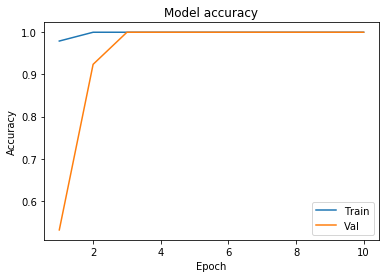

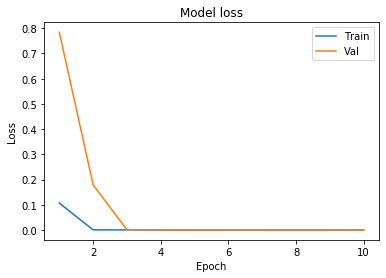

In [81]:
# Plot training and validation accuracy
epoch_range= range(1,11)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

# Plot training and validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()


In [82]:
history.history

{'loss': [0.1065745442545998,
  0.00012878662078350336,
  5.479632366713861e-05,
  3.335312808756191e-05,
  2.3500404854339268e-05,
  1.8409834352892514e-05,
  1.5056199209077615e-05,
  1.203313069153815e-05,
  9.624677419323184e-06,
  7.864961383334932e-06],
 'accuracy': [0.9791249, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [0.7842161810310506,
  0.17855194385201437,
  0.001049103080938149,
  0.0001002490992753531,
  6.017977659689723e-05,
  4.325970307544702e-05,
  3.4754529920243896e-05,
  3.1404433036557885e-05,
  2.4026564807867112e-05,
  2.0120119024391695e-05],
 'val_accuracy': [0.5310621,
  0.9238477,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0]}

### Evaluate model

In [83]:
[test_loss, test_acc] = model.evaluate(X_test, y_test, verbose=0)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Test Data : Loss = 2.0120118838862674e-05, accuracy = 1.0


### Predict the model

In [84]:
y_pred = model.predict_classes(X_test)

In [85]:
y_pred

array([1, 0, 0, ..., 1, 3, 0], dtype=int64)

In [86]:
y_test

array([1, 0, 0, ..., 1, 3, 0])

In [87]:
X_test.shape

(2994, 64, 64, 1)

In [88]:
# Make a prediction
image = X_test[1993] #Triangle. Class: 3
print('Actual class: ', y_test[1993])
yhat = model.predict([[image]])
print('Predicted: class=%d' % np.argmax(yhat))

Actual class:  3
Predicted: class=3


Found 2994 correct labels


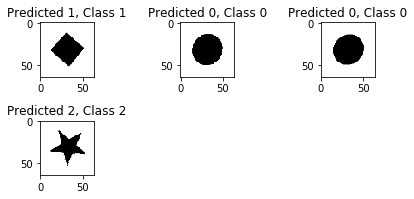

In [89]:
## Correct predictions

correct = np.where(y_pred==y_test)[0]
print('Found %d correct labels' % len(correct))
for i, correct in enumerate(correct[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(64, 64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred[correct], y_test[correct]))
    plt.tight_layout()

In [90]:
y_test.shape

(2994,)

In [91]:
## Incorrect predictions

incorrect = np.where(y_pred!=y_test)[0]
print('Found %d incorrect labels' % len(incorrect))
for i, incorrect in enumerate(incorrect[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(64,64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred[incorrect], y_test[incorrect]))
    plt.tight_layout()

Found 0 incorrect labels


In [92]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [93]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[758,   0,   0,   0],
       [  0, 730,   0,   0],
       [  0,   0, 770,   0],
       [  0,   0,   0, 736]], dtype=int64)

In [94]:
shapes

['circle', 'square', 'star', 'triangle']

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2190f66c8>)

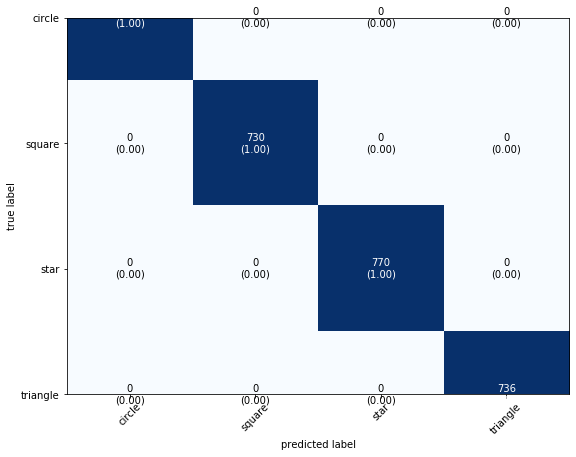

In [95]:
plot_confusion_matrix(mat,figsize=(9,9), class_names= shapes, show_normed=True)

Let's try to remove overfitting by Dropout

In [96]:
model_dropout= tf.keras.Sequential([
    
    #First convolution layer.
    tf.keras.layers.Conv2D( filters=16, kernel_size=(3,3), padding='same',activation='relu', input_shape=X_train[1].shape),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    #Second convolution layer. For this you can remove input shape. After first convolution layer you don't need input_shape
    tf.keras.layers.Conv2D( filters=32, kernel_size=(3,3), activation='relu'),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),

    #Add Dropout. To prevent overfitting.
    tf.keras.layers.Dropout(0.5), # here 50% of the output is dropped when passed to next layer in order to avoid overfitting of the data

    # Add a flattening layer
    tf.keras.layers.Flatten(),

    #Add a dense layer
   tf.keras.layers.Dense(units=128, activation='relu'),

    #Adding a final output layer
    tf.keras.layers.Dense(units=10, activation='softmax')
    
])

print(model_dropout.summary())

###### Compile model ######
model_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

###### Fit model ######
history_dropout= model_dropout.fit(X_train, y_train, batch_size=64, epochs=5, verbose=1, validation_data=(X_test, y_test))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 7200)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)             

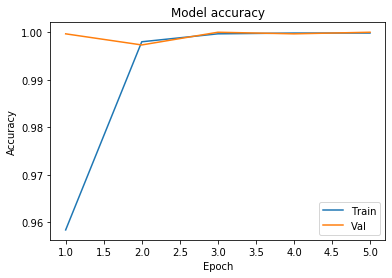

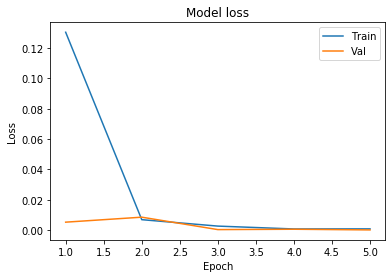

In [100]:
# Plot training and validation accuracy
epoch_range= range(1,6)
plt.plot(epoch_range, history_dropout.history['accuracy'])
plt.plot(epoch_range, history_dropout.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

# Plot training and validation loss values
plt.plot(epoch_range, history_dropout.history['loss'])
plt.plot(epoch_range, history_dropout.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()


Lets try early pooling

In [101]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

In [102]:
model_earlyPool = Sequential()
model_earlyPool.add(Conv2D(4, kernel_size=(5, 5), activation='relu', input_shape=(64,64,1), padding='same'))
model_earlyPool.add(MaxPooling2D(pool_size=(4, 4), padding='same'))
model_earlyPool.add(Dropout(0.25))
model_earlyPool.add(Conv2D(8, kernel_size=(5, 5), activation='relu', padding='same'))
model_earlyPool.add(MaxPooling2D(pool_size=(4, 4), padding='same'))
model_earlyPool.add(Dropout(0.4))
model_earlyPool.add(Flatten())
model_earlyPool.add(Dense(8, activation='relu'))
model_earlyPool.add(LeakyReLU(alpha=0.1))
model_earlyPool.add(Dropout(0.25))
model_earlyPool.add(Dense(4, activation='softmax'))

In [103]:
print(model_earlyPool.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 64, 64, 4)         104       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 4)         0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 16, 16, 4)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 8)         808       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 4, 4, 8)           0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 128)             

In [104]:
model_earlyPool.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [105]:
###### Fit model ######
history_earlyPool= model_earlyPool.fit(X_train, y_train, batch_size=64, epochs=5, verbose=1, validation_data=(X_test, y_test))

Train on 11976 samples, validate on 2994 samples
Epoch 1/5
11976/11976 [==============================] - 10s 830us/sample - loss: 1.2778 - accuracy: 0.3517 - val_loss: 0.8142 - val_accuracy: 0.7508
Epoch 2/5
11976/11976 [==============================] - 11s 932us/sample - loss: 0.7769 - accuracy: 0.6524 - val_loss: 0.3270 - val_accuracy: 0.9676
Epoch 3/5
11976/11976 [==============================] - 13s 1ms/sample - loss: 0.4795 - accuracy: 0.7912 - val_loss: 0.1302 - val_accuracy: 0.9970
Epoch 4/5
11976/11976 [==============================] - 12s 1ms/sample - loss: 0.3606 - accuracy: 0.8438 - val_loss: 0.0729 - val_accuracy: 0.9987
Epoch 5/5
11976/11976 [==============================] - 13s 1ms/sample - loss: 0.2963 - accuracy: 0.8719 - val_loss: 0.0410 - val_accuracy: 0.9990


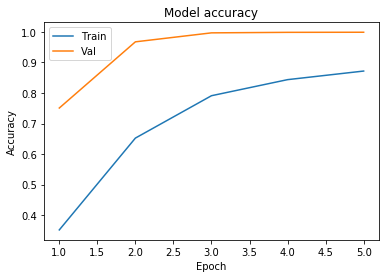

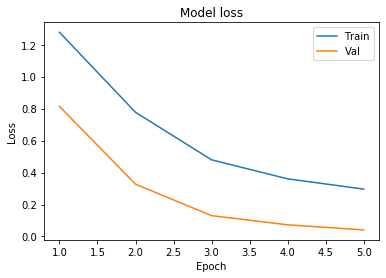

In [106]:
# Plot training and validation accuracy
epoch_range= range(1,6)
plt.plot(epoch_range, history_earlyPool.history['accuracy'])
plt.plot(epoch_range, history_earlyPool.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

# Plot training and validation loss values
plt.plot(epoch_range, history_earlyPool.history['loss'])
plt.plot(epoch_range, history_earlyPool.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()


In [107]:
# increasing epoch to 10

history_earlyPool= model_earlyPool.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 11976 samples, validate on 2994 samples
Epoch 1/10
11976/11976 [==============================] - 10s 826us/sample - loss: 0.2508 - accuracy: 0.8864 - val_loss: 0.0331 - val_accuracy: 0.9993
Epoch 2/10
11976/11976 [==============================] - 11s 894us/sample - loss: 0.2304 - accuracy: 0.8978 - val_loss: 0.0264 - val_accuracy: 0.9997
Epoch 3/10
11976/11976 [==============================] - 12s 998us/sample - loss: 0.2085 - accuracy: 0.9069 - val_loss: 0.0173 - val_accuracy: 0.9993
Epoch 4/10
11976/11976 [==============================] - 12s 1ms/sample - loss: 0.1989 - accuracy: 0.9147 - val_loss: 0.0134 - val_accuracy: 0.9993
Epoch 5/10
11976/11976 [==============================] - 12s 1ms/sample - loss: 0.1776 - accuracy: 0.9259 - val_loss: 0.0118 - val_accuracy: 0.9997
Epoch 6/10
11976/11976 [==============================] - 12s 1ms/sample - loss: 0.1806 - accuracy: 0.9263 - val_loss: 0.0084 - val_accuracy: 0.9997
Epoch 7/10
11976/11976 [===========================

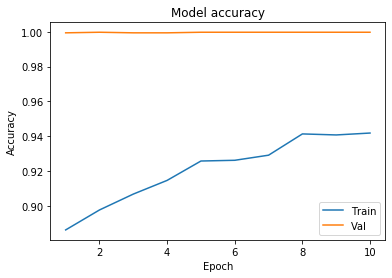

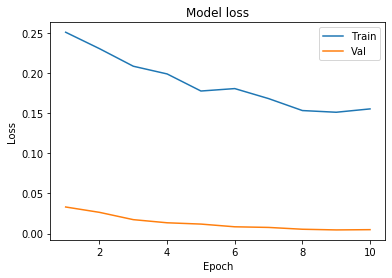

In [109]:
# Plot training and validation accuracy
epoch_range= range(1,11)
plt.plot(epoch_range, history_earlyPool.history['accuracy'])
plt.plot(epoch_range, history_earlyPool.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

# Plot training and validation loss values
plt.plot(epoch_range, history_earlyPool.history['loss'])
plt.plot(epoch_range, history_earlyPool.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

In [110]:
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

In [113]:
###### Fit model ######

train_earlyPool = model_earlyPool.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, 
                  validation_split=0.3, callbacks=[early_stopping_monitor])

Train on 8383 samples, validate on 3593 samples
Epoch 1/6
8383/8383 [==============================] - 7s 883us/sample - loss: 0.1200 - accuracy: 0.9560 - val_loss: 0.0056 - val_accuracy: 0.9989
Epoch 2/6
8383/8383 [==============================] - 9s 1ms/sample - loss: 0.1172 - accuracy: 0.9577 - val_loss: 0.0050 - val_accuracy: 0.9989
Epoch 3/6
8383/8383 [==============================] - 9s 1ms/sample - loss: 0.1212 - accuracy: 0.9531 - val_loss: 0.0045 - val_accuracy: 0.9989
Epoch 4/6
8383/8383 [==============================] - 9s 1ms/sample - loss: 0.1144 - accuracy: 0.9572 - val_loss: 0.0047 - val_accuracy: 0.9994
Epoch 5/6
8383/8383 [==============================] - 9s 1ms/sample - loss: 0.1161 - accuracy: 0.9565 - val_loss: 0.0034 - val_accuracy: 0.9992
Epoch 6/6
8383/8383 [==============================] - 9s 1ms/sample - loss: 0.1175 - accuracy: 0.9568 - val_loss: 0.0043 - val_accuracy: 0.9989


### Observation: Training accuracy is nearly the same as val_accuracy. Thus, model fits.

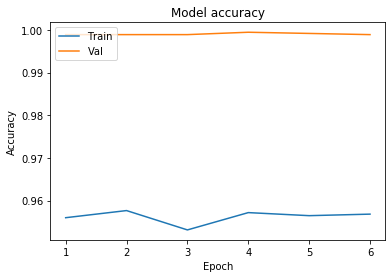

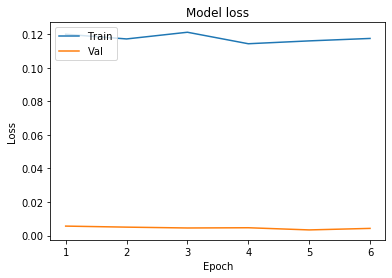

In [118]:
###### Plot Metrics Of Mode ######
epoch_range= range(1,7)
plt.plot(epoch_range, train_earlyPool.history['accuracy'])
plt.plot(epoch_range, train_earlyPool.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(epoch_range, train_earlyPool.history['loss'])
plt.plot(epoch_range, train_earlyPool.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

**NOTE: Try to display at least 5 predicted vs actual images to see if what it has predicted is proper or not**

Accuracy on test data was better  with just dropout than  with early-pooling.

# Part B - Activation function

* Any 2 Activation Function Listed below:
* Change the activation function (use at least two). How does it effect the accuracy?
*  How does it effect how quickly the network plateaus?
*  Various activation functions:
    * Rectified linear unit (ReLU)
    * TanH
    * Leaky rectified linear unit (Leaky ReLU)
    * Parameteric rectified linear unit (PReLU)
    * Randomized leaky rectified linear unit (RReLU)
    * Exponential linear unit (ELU)
    * Scaled exponential linear unit (SELU)
    * S-shaped rectified linear activation unit (SReLU)
    * Identity
    * Binary step
    * Logistic
    * ArcTan
    * Softsign
    * Adaptive piecewise linear (APL)
    * SoftPlus
    * SoftExponential
    * Sinusoid
    * Sinc
    * Gaussian

**Changing activation function form ReLU to TanH**

In [121]:
###### Define model ######
model_tanh= tf.keras.Sequential([
    
    #First convolution layer.
    tf.keras.layers.Conv2D( filters=16, kernel_size=(3,3), activation='tanh', input_shape=X_train[1].shape),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),



    #Second convolution layer. For this you can remove input shape. After first convolution layer you don't need input_shape
    tf.keras.layers.Conv2D( filters=32, kernel_size=(3,3), activation='tanh', input_shape=X_train[1].shape),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    # Add a flattening layer
    tf.keras.layers.Flatten(),

    #Add a dense layer
   tf.keras.layers.Dense(units=128, activation='tanh'),
   tf.keras.layers.Dropout(0.25),


    #Adding a final output layer
    tf.keras.layers.Dense(units=10, activation='softmax')
    
])


# summarize the model
print(model_tanh.summary())

###### Compile model ######
model_tanh.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

###### Fit model ######
history_tanh= model_tanh.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test, y_test))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 62, 62, 16)        160       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 31, 31, 16)        64        
_________________________________________________________________
dropout_28 (Dropout)         (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 32)      

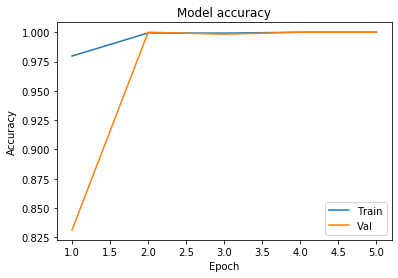

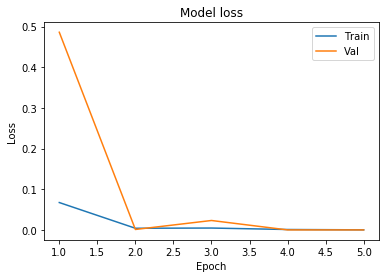

Evaluation result on Test Data : Loss = 0.000198910212225307, accuracy = 1.0


(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a21ecfbe08>)

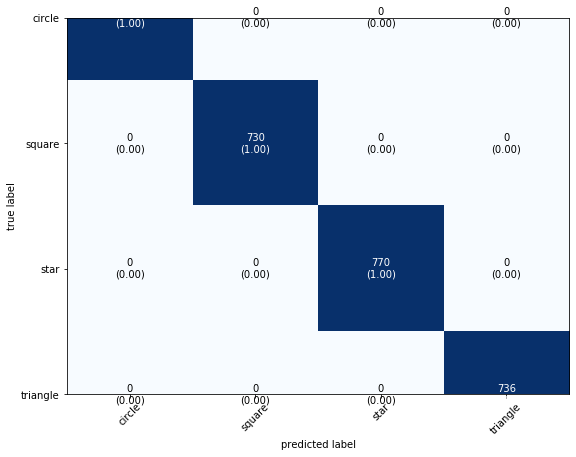

In [123]:
###### Plot Metrics Of Mode ######
epoch_range= range(1,6)
plt.plot(epoch_range, history_tanh.history['accuracy'])
plt.plot(epoch_range, history_tanh.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

# Plot training and validation loss values
plt.plot(epoch_range, history_tanh.history['loss'])
plt.plot(epoch_range, history_tanh.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

###### Evaluate model ######
[test_loss, test_acc] = model_tanh.evaluate(X_test, y_test, verbose=0)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

###### Predict model ######
y_pred_tanh = model_tanh.predict_classes(X_test)

cf_matrix_tanh = confusion_matrix(y_test, y_pred_tanh)

plot_confusion_matrix(cf_matrix_tanh,figsize=(9,9), class_names= shapes, show_normed=True)


In [124]:
# Make a prediction
image = X_train[7865]
print("Actual class: ", y_train[7865])
yhat = model_tanh.predict([[image]])
print('Predicted: class=%d' % np.argmax(yhat))

Actual class:  3
Predicted: class=3


Found 2994 correct labels
(2994,)


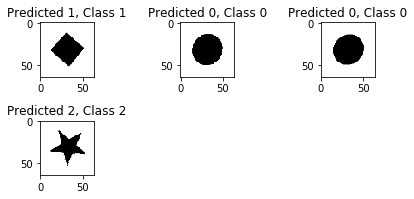

In [127]:
correct = np.where(y_pred_tanh==y_test)[0]
print('Found %d correct labels' % len(correct))
for i, correct in enumerate(correct[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(64, 64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_tanh[correct], y_test[correct]))
    plt.tight_layout()
    
print(y_test.shape)   


In [128]:
incorrect = np.where(y_pred_tanh!=y_test)[0]
print('Found %d incorrect labels' % len(incorrect))
for i, incorrect in enumerate(incorrect[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(64,64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_tanh[incorrect], y_test[incorrect]))
    plt.tight_layout()

Found 0 incorrect labels


Change the activation function (use at least two). How does it affect the accuracy?
A: tanH provided as good result as relu. with accuracy maintained at 1.0

How does it affect how quickly the network plateaus?
A: Unlike the  relu, training accuracy plot for the tanh plateaus does not vary a lot and has a stable accuracy within the 5 epochs.

tanH activation function gives good results

**Changing activation function from ReLU to Leaky ReLU**

In [129]:
from tensorflow.keras.layers import LeakyReLU

In [131]:
###### Define model ######
model_leakyReLU= tf.keras.Sequential([
    
    #First convolution layer.
    tf.keras.layers.Conv2D( filters=12, kernel_size=(3,3), activation='linear', input_shape=X_train[1].shape, padding='same'),
    # Leaky ReLU layer
    tf.keras.layers.LeakyReLU(alpha=0.3),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),

    #Second convolution layer. For this you can remove input shape. After first convolution layer you don't need input_shape
    tf.keras.layers.Conv2D( filters=32, kernel_size=(3,3), activation='linear', input_shape=X_train[1].shape),
    # Leaky ReLU layer
    tf.keras.layers.LeakyReLU(alpha=0.3),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),

    #Add Dropout. To prevent overfitting.
#     model.add(Dropout(0.5)) # here 50% of the output is dropped when passed to next layer in order to avoid overfitting of the data

    # Add a flattening layer
    tf.keras.layers.Flatten(),

    #Add a dense layer
   tf.keras.layers.Dense(units=64, activation='linear'),
    tf.keras.layers.LeakyReLU(alpha=0.3),

    #Adding a final output layer
    tf.keras.layers.Dense(units=10, activation='softmax')
    
])

print(model_leakyReLU.summary())

# summarize the model
from tensorflow.keras.utils import plot_model
plot_model(model_leakyReLU, 'modelLeakyReLU.png', show_shapes=True)

###### Compile model ######
model_leakyReLU.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

###### Fit model ######
history_leakyReLU= model_leakyReLU.fit(X_train, y_train, batch_size=64, epochs=5, verbose=0, validation_data=(X_test, y_test))

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 64, 64, 12)        120       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 64, 64, 12)        0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 32, 32, 12)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 30, 30, 32)        3488      
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 7200)            

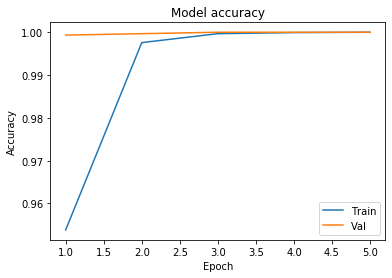

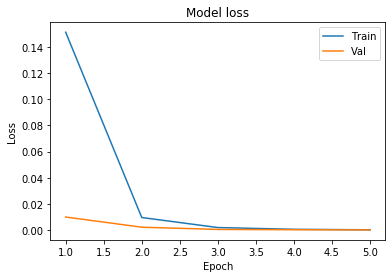

Evaluation result on Test Data : Loss = 0.000198910212225307, accuracy = 1.0


(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a21a3997c8>)

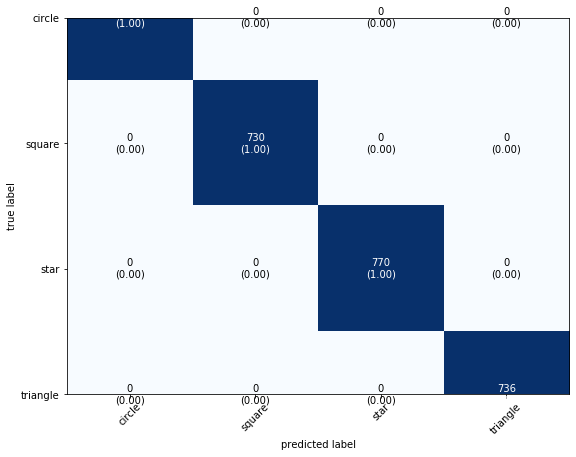

In [133]:
###### Plot Metrics Of Mode ######
epoch_range= range(1,6)
plt.plot(epoch_range, history_leakyReLU.history['accuracy'])
plt.plot(epoch_range, history_leakyReLU.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

# Plot training and validation loss values
plt.plot(epoch_range, history_leakyReLU.history['loss'])
plt.plot(epoch_range, history_leakyReLU.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

###### Evaluate Model ######
[test_loss, test_acc] = model_tanh.evaluate(X_test, y_test, verbose=0)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

###### Predict model ######
y_pred_leakyReLU = model_leakyReLU.predict_classes(X_test)

cf_matrix_leakyReLU = confusion_matrix(y_test, y_pred_leakyReLU)

plot_confusion_matrix(cf_matrix_leakyReLU,figsize=(9,9), class_names= shapes, show_normed=True)


Found 2994 correct labels
(2994,)


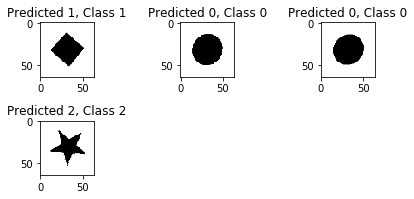

In [135]:
correct = np.where(y_pred_tanh==y_test)[0]
print('Found %d correct labels' % len(correct))
for i, correct in enumerate(correct[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(64, 64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_tanh[correct], y_test[correct]))
    plt.tight_layout()
    
print(y_test.shape)   


In [136]:
incorrect = np.where(y_pred_tanh!=y_test)[0]
print('Found %d incorrect labels' % len(incorrect))
for i, incorrect in enumerate(incorrect[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(64,64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_tanh[incorrect], y_test[incorrect]))
    plt.tight_layout()

Found 0 incorrect labels


In [137]:
# Make a prediction
image = X_train[8096]
print("Actual class: ", y_train[8096])
yhat = model_leakyReLU.predict([[image]])
print('Predicted: class=%d' % np.argmax(yhat))

Actual class:  2
Predicted: class=2


Change the activation function (use at least two). How does it affect the accuracy?

A: leakyReLU provided as good result as relu. with accuracy maintained at 1.0

How does it affect how quickly the network plateaus?

A: Unlike the  relu, training accuracy plot for the LeakyReLU plateaus does not vary a lot and has a stable accuracy within the 5 epochs.

# Part C- Cost Function

Use at least two

On your *Deep Learning model* data

* Change the cost function (use at least two). How does it effect the accuracy?
* How does it effect how quickly the network plateaus?
* Various forms of cost:
    * Quadratic cost (mean-square error)
    * Cross-Entropy
    * Hinge
    * Kullback–Leibler divergence
    * Cosine Proximity
    * User defined

1. Regression Loss Functions
    * Mean Squared Error Loss
    * Mean Squared Logarithmic Error Loss
    * Mean Absolute Error Loss
2. Binary Classification Loss Functions
    * Binary Cross-Entropy
    * Hinge Loss
    * Squared Hinge Loss
3. Multi-Class Classification Loss Functions
    * Multi-Class Cross-Entropy Loss
    * Sparse Multiclass Cross-Entropy Loss
    * Kullback Leibler Divergence Loss

Cross-entropy can be specified as the loss function in Keras by specifying ‘categorical_crossentropy‘ when compiling the model.

The function requires that the output layer is configured with an n nodes (one for each class), in this case three nodes, and a ‘softmax‘ activation in order to predict the probability for each class

In turn, this means that the target variable must be one hot encoded.

To ensure that each sample has an expected probability of 1.0 for the actual class value and an expected probability of 0.0 for all other class values. This can be achieved using the to_categorical() Keras function.

In [139]:
# one hot encode output variable: Training data
y_train_oneHot = keras.utils.to_categorical(y_train)

In [140]:
y_train_oneHot

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [141]:
len(y_train_oneHot)

11976

In [142]:
# one hot encode output variable: Testing data
y_test_oneHot = keras.utils.to_categorical(y_test)
y_test_oneHot

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

### Cost function change from **"Sparse Categorical CrossEntropy"** to **"Categorical CrossEntropy"**

In [145]:
###### Define model ######

model_costfn1= tf.keras.Sequential([
    
    #First convolution layer.
    tf.keras.layers.Conv2D( filters=4, kernel_size=(3,3), activation='relu', input_shape=X_train[1].shape),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    #Second convolution layer. For this you can remove input shape. After first convolution layer you don't need input_shape
    tf.keras.layers.Conv2D( filters=12, kernel_size=(3,3), activation='relu', input_shape=X_train[1].shape),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    #Add Dropout. To prevent overfitting.
    tf.keras.layers.Dropout(0.5), # here 50% of the output is dropped when passed to next layer in order to avoid overfitting of the data

    # Add a flattening layer
    tf.keras.layers.Flatten(),

    #Add a dense layer
   tf.keras.layers.Dense(units=12, activation='relu'),

    #Adding a final output layer
    tf.keras.layers.Dense(units=4, activation='softmax')
    
])

print(model_costfn1.summary())

###### Compile model ######
model_costfn1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

###### Fit model ######
history_1= model_costfn1.fit(X_train, y_train_oneHot, batch_size=16, epochs=5, verbose=0, validation_data=(X_test, y_test_oneHot))

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 62, 62, 4)         40        
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 31, 31, 4)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 29, 29, 12)        444       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 14, 14, 12)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 14, 14, 12)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 2352)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 12)              

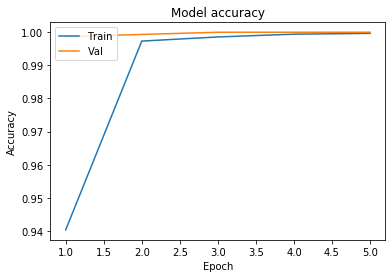

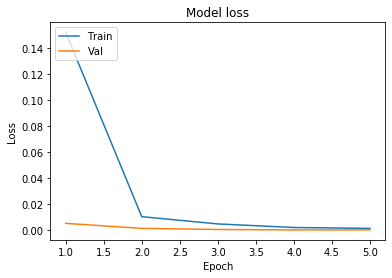

Evaluation result on Test Data : Loss = 4.2524620789405255e-05, accuracy = 1.0


(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a211154dc8>)

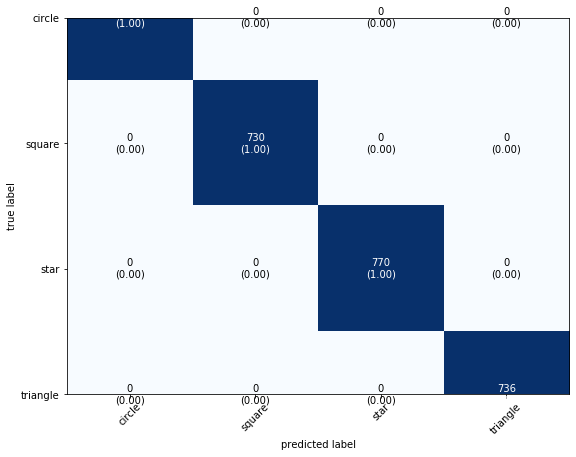

In [146]:
###### Plot Metrics Of Mode ######
epoch_range= range(1,6)
plt.plot(epoch_range, history_1.history['accuracy'])
plt.plot(epoch_range, history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(epoch_range, history_1.history['loss'])
plt.plot(epoch_range, history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

###### Evaluate Model ######
[test_loss, test_acc] = model_costfn1.evaluate(X_test, y_test_oneHot, verbose=0)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

###### Predict model ######
y_pred_1 = model_costfn1.predict_classes(X_test)

cf_matrix_1 = confusion_matrix(y_test, y_pred_1)

plot_confusion_matrix(cf_matrix_1,figsize=(9,9), class_names= shapes, show_normed=True)

Change the activation function (use at least two). How does it affect the accuracy?
A: categorical crossentropy crossfunction overfitthe model.

How does it affect how quickly the network plateaus?
A: Unlike the  sparse categorical crossentropy, training accuracy plot for the categorical crossentropy plateaus does not vary a lot and has a stable accuracy within the 5 epochs.

### Cost function change from **"Sparse Categorical CrossEntropy"** to **"Kullback Leibler Divergence Loss"**

In [148]:
###### Define model ######

model_costfn2= tf.keras.Sequential([
    
    #First convolution layer.
    tf.keras.layers.Conv2D( filters=32, kernel_size=(3,3), activation='relu', input_shape=X_train[1].shape),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    #Second convolution layer. For this you can remove input shape. After first convolution layer you don't need input_shape
    tf.keras.layers.Conv2D( filters=64, kernel_size=(3,3), activation='relu', input_shape=X_train[1].shape),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    #Add Dropout. To prevent overfitting.
#     model.add(Dropout(0.5)) # here 50% of the output is dropped when passed to next layer in order to avoid overfitting of the data

    # Add a flattening layer
    tf.keras.layers.Flatten(),

    #Add a dense layer
   tf.keras.layers.Dense(units=128, activation='relu'),

    #Adding a final output layer
    tf.keras.layers.Dense(units=4, activation='softmax')
    
])

print(model_costfn2.summary())

###### Compile model ######
model_costfn2.compile(optimizer='adam', loss='kullback_leibler_divergence', metrics=['accuracy'])

###### Fit model ######
history_2= model_costfn2.fit(X_train, y_train_oneHot, batch_size=10, epochs=5, verbose=1, validation_data=(X_test, y_test_oneHot))

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dense_41 (Dense)             (None, 4)               

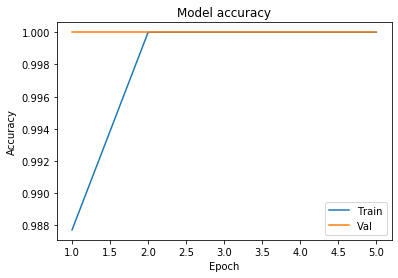

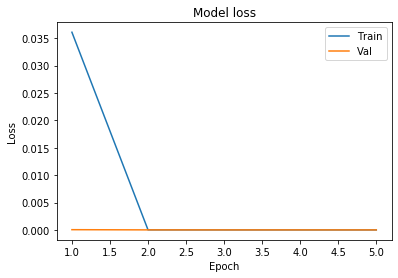

Evaluation result on Test Data : Loss = 4.2524620789405255e-05, accuracy = 1.0


(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a221fe5b88>)

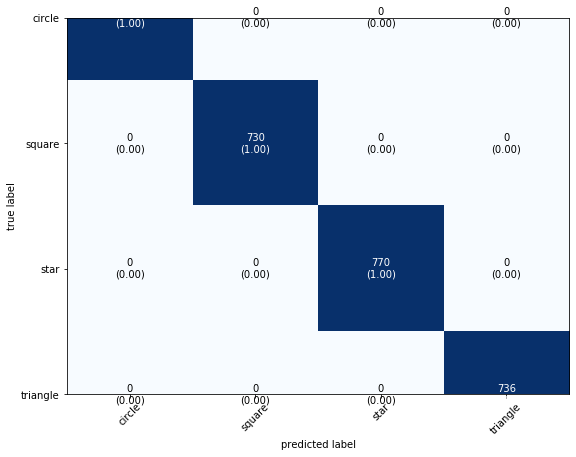

In [149]:
###### Plot Metrics Of Mode ######
epoch_range= range(1,6)
plt.plot(epoch_range, history_2.history['accuracy'])
plt.plot(epoch_range, history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

# Plot training and validation loss values
plt.plot(epoch_range, history_2.history['loss'])
plt.plot(epoch_range, history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

###### Evaluate Model ######
[test_loss, test_acc] = model_costfn1.evaluate(X_test, y_test_oneHot, verbose=0)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

###### Predict model ######
y_pred_2 = model_costfn2.predict_classes(X_test)

cf_matrix_2 = confusion_matrix(y_test, y_pred_2)

plot_confusion_matrix(cf_matrix_2,figsize=(9,9), class_names= shapes, show_normed=True)

Found 2994 correct labels
(2994,)


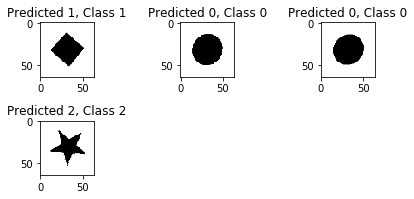

In [151]:
correct = np.where(y_pred_2==y_test)[0]
print('Found %d correct labels' % len(correct))
for i, correct in enumerate(correct[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(64, 64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_2[correct], y_test[correct]))
    plt.tight_layout()
    
print(y_test.shape)   

In [152]:
incorrect = np.where(y_pred_2!=y_test)[0]
print('Found %d incorrect labels' % len(incorrect))
for i, incorrect in enumerate(incorrect[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(64,64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_2[incorrect], y_test[incorrect]))
    plt.tight_layout()

Found 0 incorrect labels


Change the activation function (use at least two). How does it affect the accuracy?

A: kullback_leibler_divergence crossfunction overfitthe model.

How does it affect how quickly the network plateaus?
A: Unlike the  sparse categorical crossentropy, training accuracy plot for the kullback_leibler_divergence plateaus does not vary a lot and has a stable accuracy within the 5 epochs.

# Part D - Epochs 

On your *Deep Learning model* data

* Change the number of epochs initialization. How does it effect the accuracy?
* How quickly does the network plateau?

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

What Is the Difference Between Batch and Epoch?
The batch size is a number of samples processed before the model is updated.

The number of epochs is the number of complete passes through the training dataset.

The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.

The number of epochs can be set to an integer value between one and infinity. You can run the algorithm for as long as you like and even stop it using other criteria besides a fixed number of epochs, such as a change (or lack of change) in model error over time.

They are both integer values and they are both hyperparameters for the learning algorithm, e.g. parameters for the learning process, not internal model parameters found by the learning process.

You must specify the batch size and number of epochs for a learning algorithm.

There are no magic rules for how to configure these parameters. You must try different values and see what works best for your problem.

In [154]:
###### Define model ######

model_epoch20= tf.keras.Sequential([
    
    #First convolution layer.
    tf.keras.layers.Conv2D( filters=4, kernel_size=(3,3), activation='relu', input_shape=X_train[1].shape),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    #Second convolution layer. For this you can remove input shape. After first convolution layer you don't need input_shape
    tf.keras.layers.Conv2D( filters=8, kernel_size=(3,3), activation='relu', input_shape=X_train[1].shape),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    #Add Dropout. To prevent overfitting.
#     model.add(Dropout(0.5)) # here 50% of the output is dropped when passed to next layer in order to avoid overfitting of the data

    # Add a flattening layer
    tf.keras.layers.Flatten(),

    #Add a dense layer
   tf.keras.layers.Dense(units=8, activation='relu'),

    #Adding a final output layer
    tf.keras.layers.Dense(units=4, activation='softmax')
    
])

print(model_epoch20.summary())

###### Compile model ######
model_epoch20.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

###### Fit model ######
history_epoch20= model_epoch20.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_test, y_test))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 62, 62, 4)         40        
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 31, 31, 4)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 29, 29, 8)         296       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 8)                 12552     
_________________________________________________________________
dense_45 (Dense)             (None, 4)               

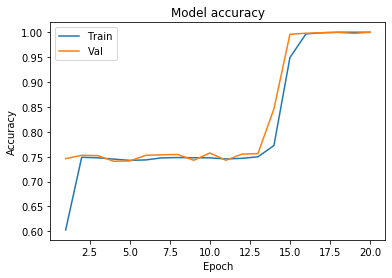

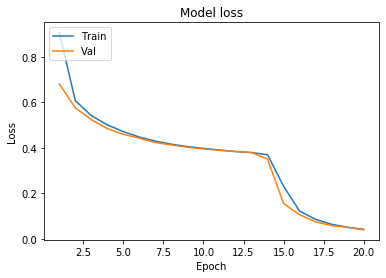

In [155]:
###### Plot Metrics Of Mode ######
epoch_range= range(1,21)
plt.plot(epoch_range, history_epoch20.history['accuracy'])
plt.plot(epoch_range, history_epoch20.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(epoch_range, history_epoch20.history['loss'])
plt.plot(epoch_range, history_epoch20.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Evaluation result on Test Data : Loss = 0.03892464917613493, accuracy = 1.0


(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2143e29c8>)

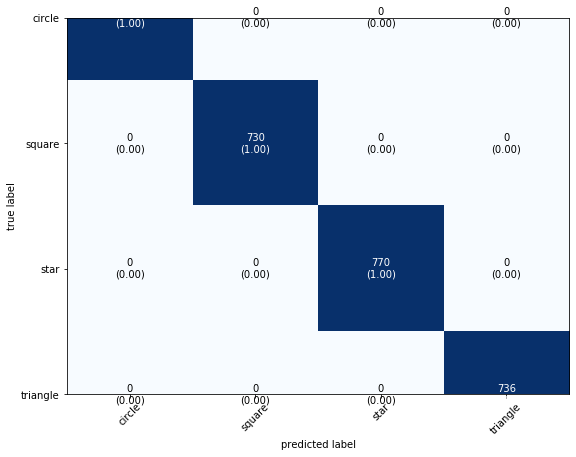

In [156]:
###### Evaluate Model ######
[test_loss, test_acc] = model_epoch20.evaluate(X_test, y_test, verbose=0)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

###### Predict model ######
y_pred_epoch20 = model_epoch20.predict_classes(X_test)

cf_matrix_epoch20 = confusion_matrix(y_test, y_pred_epoch20)

plot_confusion_matrix(cf_matrix_epoch20,figsize=(9,9), class_names= shapes, show_normed=True)

Found 2994 correct labels
(2994,)


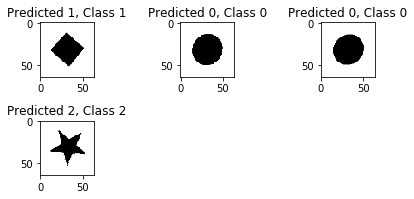

In [158]:
correct = np.where(y_pred_epoch20==y_test)[0]
print('Found %d correct labels' % len(correct))
for i, correct in enumerate(correct[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(64, 64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_epoch20[correct], y_test[correct]))
    plt.tight_layout()
    
print(y_test.shape)   

In [159]:

incorrect = np.where(y_pred_epoch20!=y_test)[0]
print('Found %d incorrect labels' % len(incorrect))
for i, incorrect in enumerate(incorrect[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(64,64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_epoch20[incorrect], y_test[incorrect]))
    plt.tight_layout()

Found 0 incorrect labels


* Change the number of epochs initialization. How does it affect the accuracy?

A: Accuracy has improved from 0.7 to 1.0. Even loss and accuracy are close to each other.Thus, being a good fit.

How quickly does the network plateau?
A: 

# Part E - Gradient estimation

Use at least two

On your *Deep Learning model* data

* Change the gradient estimation (use at least two). How does it effect the accuracy?
* How does it effect how quickly the network plateaus?
* Various forms of gradient estimation:
    * Stochastic Gradient Descent
    * Adagrad
    * RMSProp
    * ADAM
    * NAG
    * Adadelta
    * Momentum

Trying Adagrad

In [162]:
###### Define model ######

model_adagrad= tf.keras.Sequential([
    
    #First convolution layer.
    tf.keras.layers.Conv2D( filters=4, kernel_size=(3,3), activation='relu', input_shape=X_train[1].shape),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    #Second convolution layer. For this you can remove input shape. After first convolution layer you don't need input_shape
    tf.keras.layers.Conv2D( filters=8, kernel_size=(3,3), activation='relu'),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    #Add Dropout. To prevent overfitting.
#     model.add(Dropout(0.5)) # here 50% of the output is dropped when passed to next layer in order to avoid overfitting of the data

    # Add a flattening layer
    tf.keras.layers.Flatten(),

    #Add a dense layer
   tf.keras.layers.Dense(units=128, activation='relu'),

    #Adding a final output layer
    tf.keras.layers.Dense(units=4, activation='softmax')
    
])

print(model_adagrad.summary())

###### Compile model ######
model_adagrad.compile(optimizer='adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

###### Fit model ######
history_adagrad= model_adagrad.fit(X_train, y_train, batch_size=32, epochs=5, verbose=0, validation_data=(X_test, y_test))

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 62, 62, 4)         40        
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 31, 31, 4)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 29, 29, 8)         296       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               200832    
_________________________________________________________________
dense_47 (Dense)             (None, 4)               

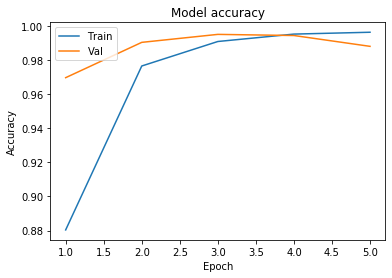

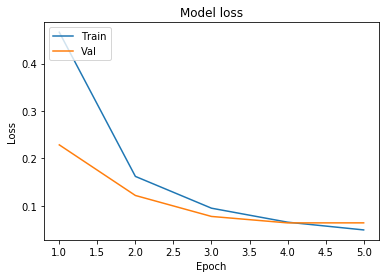

In [163]:
###### Plot Metrics Of Mode ######
epoch_range= range(1,6)
plt.plot(epoch_range, history_adagrad.history['accuracy'])
plt.plot(epoch_range, history_adagrad.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(epoch_range, history_adagrad.history['loss'])
plt.plot(epoch_range, history_adagrad.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Evaluation result on Test Data : Loss = 0.06394127269108135, accuracy = 0.9879759550094604


(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a22466f7c8>)

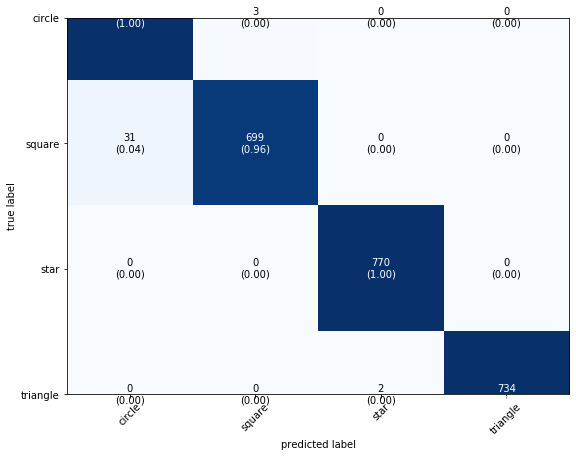

In [164]:
###### Evaluate Model ######
[test_loss, test_acc] = model_adagrad.evaluate(X_test, y_test, verbose=0)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

###### Predict model ######
y_pred_adagrad = model_adagrad.predict_classes(X_test)

cf_matrix_adagrad = confusion_matrix(y_test, y_pred_adagrad)

plot_confusion_matrix(cf_matrix_adagrad,figsize=(9,9), class_names= shapes, show_normed=True)

Found 2958 correct labels
(2994,)


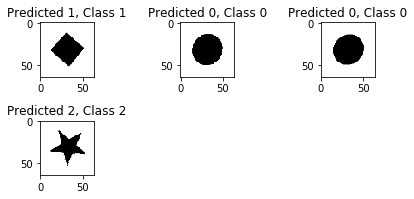

In [166]:
correct = np.where(y_pred_adagrad==y_test)[0]
print('Found %d correct labels' % len(correct))
for i, correct in enumerate(correct[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(64, 64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_adagrad[correct], y_test[correct]))
    plt.tight_layout()
    
print(y_test.shape)   

Found 36 incorrect labels


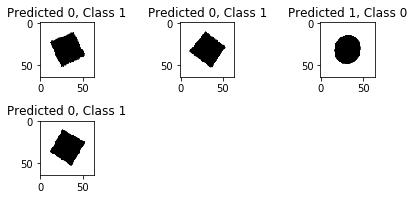

In [167]:

incorrect = np.where(y_pred_adagrad!=y_test)[0]
print('Found %d incorrect labels' % len(incorrect))
for i, incorrect in enumerate(incorrect[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(64,64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_adagrad[incorrect], y_test[incorrect]))
    plt.tight_layout()

Change the gradient estimation (use at least two). How does it affect the accuracy?
A: Yes. There is a drastic change in incorrect labels.

How does it affect how quickly the network plateaus?
A: 

 Stochastic gradient descent 

In [168]:
###### Define model ######

model_sgd= tf.keras.Sequential([
    
    #First convolution layer.
    tf.keras.layers.Conv2D( filters=4, kernel_size=(3,3), activation='relu', input_shape=X_train[1].shape),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    #Second convolution layer. For this you can remove input shape. After first convolution layer you don't need input_shape
    tf.keras.layers.Conv2D( filters=12, kernel_size=(3,3), activation='relu', input_shape=X_train[1].shape),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    #Add Dropout. To prevent overfitting.
#     model.add(Dropout(0.5)) # here 50% of the output is dropped when passed to next layer in order to avoid overfitting of the data

    # Add a flattening layer
    tf.keras.layers.Flatten(),

    #Add a dense layer
   tf.keras.layers.Dense(units=12, activation='relu'),

    #Adding a final output layer
    tf.keras.layers.Dense(units=4, activation='softmax')
    
])

print(model_adagrad.summary())

###### Compile model ######
# from tf.keras.optimizers import SGD
# from tf.keras import metrics
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_sgd.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

###### Fit model ######
history_sgd= model_sgd.fit(X_train, y_train, batch_size=32, epochs=5, verbose=0, validation_data=(X_test, y_test))

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 62, 62, 4)         40        
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 31, 31, 4)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 29, 29, 8)         296       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               200832    
_________________________________________________________________
dense_47 (Dense)             (None, 4)               

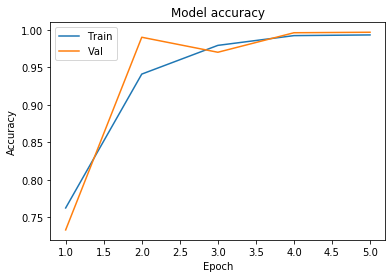

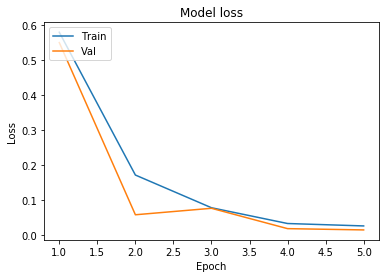

In [169]:
###### Plot Metrics Of Mode ######
epoch_range= range(1,6)
plt.plot(epoch_range, history_sgd.history['accuracy'])
plt.plot(epoch_range, history_sgd.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(epoch_range, history_sgd.history['loss'])
plt.plot(epoch_range, history_sgd.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Evaluation result on Test Data : Loss = 0.014931223209656192, accuracy = 0.9969939589500427


(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a228d653c8>)

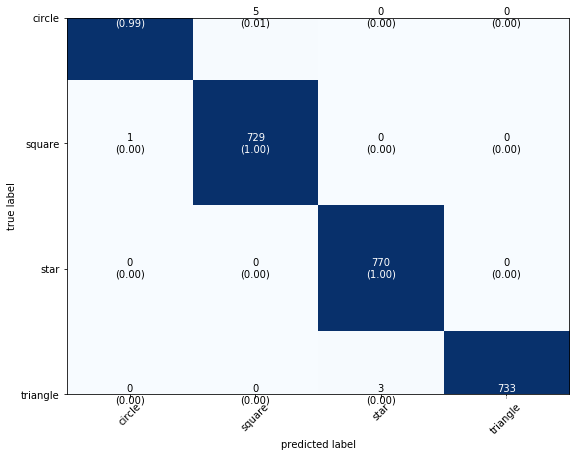

In [170]:
###### Evaluate Model ######
[test_loss, test_acc] = model_sgd.evaluate(X_test, y_test, verbose=0)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

###### Predict model ######
y_pred_sgd = model_sgd.predict_classes(X_test)

cf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)

plot_confusion_matrix(cf_matrix_sgd,figsize=(9,9), class_names= shapes, show_normed=True)

Found 2985 correct labels
(2994,)
Found 9 incorrect labels


C:\Users\joiss\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


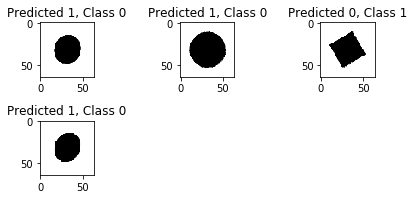

In [171]:
correct = np.where(y_pred_sgd==y_test)[0]
print('Found %d correct labels' % len(correct))
for i, correct in enumerate(correct[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(64, 64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_sgd[correct], y_test[correct]))
    plt.tight_layout()
    
print(y_test.shape)   

incorrect = np.where(y_pred_sgd!=y_test)[0]
print('Found %d incorrect labels' % len(incorrect))
for i, incorrect in enumerate(incorrect[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(64,64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_sgd[incorrect], y_test[incorrect]))
    plt.tight_layout()

Found 9 incorrect labels


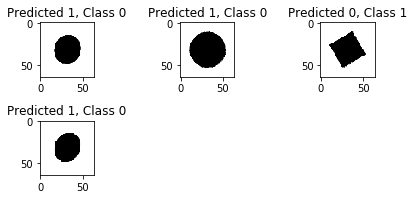

In [172]:

incorrect = np.where(y_pred_sgd!=y_test)[0]
print('Found %d incorrect labels' % len(incorrect))
for i, incorrect in enumerate(incorrect[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(64,64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_sgd[incorrect], y_test[incorrect]))
    plt.tight_layout()

Change the number of epochs initialization. How does it affect the accuracy?
A: This model is better than Adagrad. But still has incorrectly classified labels. Thus, adam provides much better result than adagrad and sgd.

How quickly does the network plateau?

# Part F - Network Architecture

Use at least two

On your Deep Learning model data

* Change the network architecture (use at least two). How does it effect the accuracy?
* How does it effect how quickly the network plateaus?
* Various forms of network architecture:
    * Number of layers
    * Size of each layer
    * Connection type
    * Pre-trained components?

Add batch normalization and an extra layer and see how the baseline model changes

In [173]:
###### Define model ######

model_partF= tf.keras.Sequential([
    
    #First convolution layer.
    tf.keras.layers.Conv2D( filters=4, kernel_size=(3,3), activation='relu', input_shape=X_train[1].shape),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25), # here 50% of the output is dropped when passed to next layer in order to avoid overfitting of the data


    #Second convolution layer. For this you can remove input shape. After first convolution layer you don't need input_shape
    tf.keras.layers.Conv2D( filters=8, kernel_size=(3,3), activation='relu'),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25), # here 50% of the output is dropped when passed to next layer in order to avoid overfitting of the data


    #Third convolution layer. For this you can remove input shape. After first convolution layer you don't need input_shape
    tf.keras.layers.Conv2D( filters=16, kernel_size=(3,3), activation='relu'),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4), # here 50% of the output is dropped when passed to next layer in order to avoid overfitting of the data

    #Fourth convolution layer. For this you can remove input shape. After first convolution layer you don't need input_shape
    tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),

    #Add Dropout. To prevent overfitting.
    tf.keras.layers.Dropout(0.5), # here 50% of the output is dropped when passed to next layer in order to avoid overfitting of the data

    # Add a flattening layer
    tf.keras.layers.Flatten(),

    #Add a dense layer
   tf.keras.layers.Dense(units=64, activation='relu'),

    #Adding a final output layer
    tf.keras.layers.Dense(units=4, activation='softmax')
    
])

print(model_partF.summary())

###### Compile model ######
model_partF.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

###### Fit model ######
history_partF= model_partF.fit(X_train, y_train, batch_size=64, epochs=8, verbose=1, validation_data=(X_test, y_test))

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 62, 62, 4)         40        
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 31, 31, 4)         0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 31, 31, 4)         16        
_________________________________________________________________
dropout_33 (Dropout)         (None, 31, 31, 4)         0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 29, 29, 8)         296       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 14, 14, 8)       

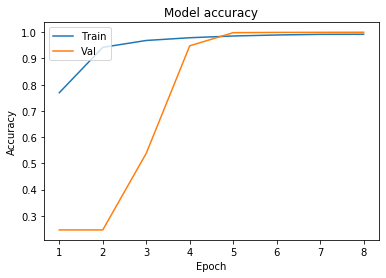

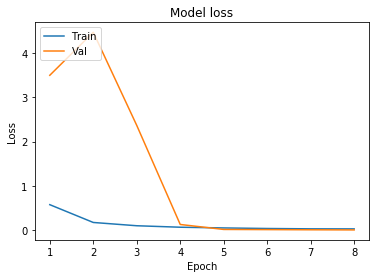

In [174]:
###### Plot Metrics Of Mode ######
epoch_range= range(1,9)
plt.plot(epoch_range, history_partF.history['accuracy'])
plt.plot(epoch_range, history_partF.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(epoch_range, history_partF.history['loss'])
plt.plot(epoch_range, history_partF.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Evaluation result on Test Data : Loss = 0.0012656140052769444, accuracy = 1.0


(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a210291588>)

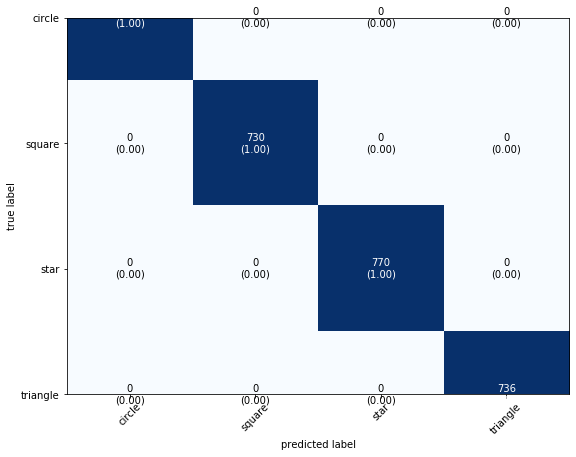

In [175]:
###### Evaluate Model ######
[test_loss, test_acc] = model_partF.evaluate(X_test, y_test, verbose=0)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

###### Predict model ######
y_pred_partF = model_partF.predict_classes(X_test)

cf_matrix_partF = confusion_matrix(y_test, y_pred_partF)

plot_confusion_matrix(cf_matrix_partF,figsize=(9,9), class_names= shapes, show_normed=True)

Found 2994 correct labels
(2994,)


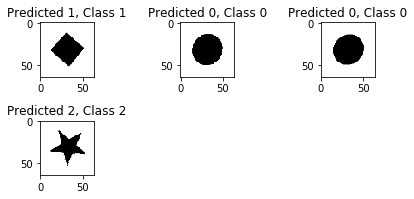

In [176]:
correct = np.where(y_pred_partF==y_test)[0]
print('Found %d correct labels' % len(correct))
for i, correct in enumerate(correct[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(64, 64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_partF[correct], y_test[correct]))
    plt.tight_layout()
    
print(y_test.shape)   

In [177]:

incorrect = np.where(y_pred_partF!=y_test)[0]
print('Found %d incorrect labels' % len(incorrect))
for i, incorrect in enumerate(incorrect[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(64,64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_partF[incorrect], y_test[incorrect]))
    plt.tight_layout()

Found 0 incorrect labels


Observation: High variations in epoch. But stable after a point. 1.0 Accuracy achieved after 5th epoch.

Change the network architecture initialization. How does it affect the accuracy?
A: Observation: High variations in epoch. But stable after a point. 1.0 Accuracy achieved after 5th epoch.

How quickly does the network plateau?
A: Result varies across 8 epochs. Not stable accuracy.

# Part G - Network initialization (5 points)
Use at least two

On your Deep Learning model data

* Change the network initialization (use at least two). How does it effect the accuracy?
* How does it effect how quickly the network plateaus?
* Various forms of network initialization:
    * 0
    * Uniform
    * Gaussian
    * Xavier Glorot Initialization http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization
    * Xavier Uniform
    * Xavier Gaussian

In [179]:
###### Define model ######

model_partF= tf.keras.Sequential([

    #First convolution layer.
    tf.keras.layers.Conv2D( filters=4, kernel_size=(3,3), kernel_initializer='uniform',activation='relu', input_shape=X_train[1].shape),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25), # here 50% of the output is dropped when passed to next layer in order to avoid overfitting of the data


    #Second convolution layer. For this you can remove input shape. After first convolution layer you don't need input_shape
    tf.keras.layers.Conv2D( filters=8, kernel_size=(3,3), activation='relu'),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25), # here 50% of the output is dropped when passed to next layer in order to avoid overfitting of the data

    # Add a flattening layer
    tf.keras.layers.Flatten(),

    #Add a dense layer
   tf.keras.layers.Dense(units=64, activation='relu'),

    #Adding a final output layer
    tf.keras.layers.Dense(units=4, activation='softmax')
    
])

print(model_partF.summary())

###### Compile model ######
model_partF.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

###### Fit model ######
history_partF= model_partF.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test))

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 62, 62, 4)         40        
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 31, 31, 4)         0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 31, 31, 4)         16        
_________________________________________________________________
dropout_37 (Dropout)         (None, 31, 31, 4)         0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 29, 29, 8)         296       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 14, 14, 8)       

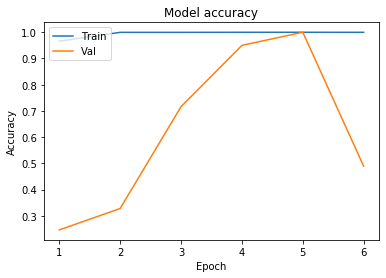

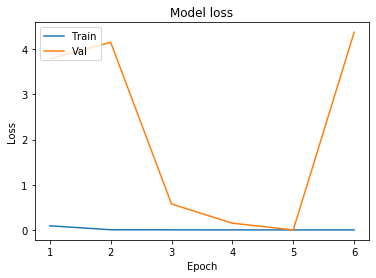

In [181]:
###### Plot Metrics Of Mode ######
epoch_range= range(1,7)
plt.plot(epoch_range, history_partF.history['accuracy'])
plt.plot(epoch_range, history_partF.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(epoch_range, history_partF.history['loss'])
plt.plot(epoch_range, history_partF.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Evaluation result on Test Data : Loss = 4.37412898223561, accuracy = 0.48897796869277954


(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a22ee82a08>)

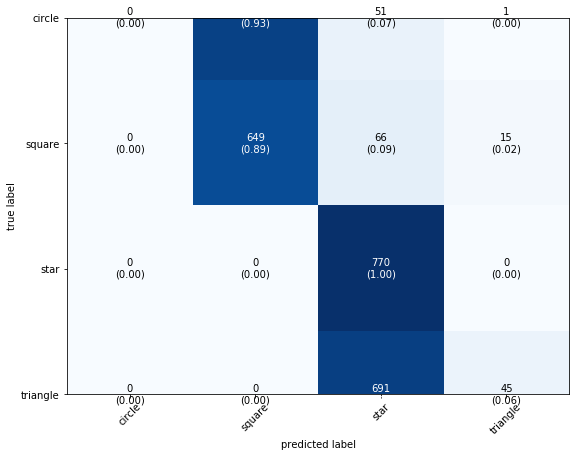

In [182]:
###### Evaluate Model ######
[test_loss, test_acc] = model_partF.evaluate(X_test, y_test, verbose=0)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

###### Predict model ######
y_pred_partF = model_partF.predict_classes(X_test)

cf_matrix_partF = confusion_matrix(y_test, y_pred_partF)

plot_confusion_matrix(cf_matrix_partF,figsize=(9,9), class_names= shapes, show_normed=True)

Found 1464 correct labels
(2994,)


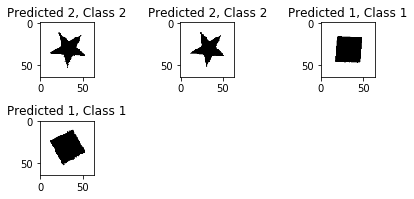

In [183]:
correct = np.where(y_pred_partF==y_test)[0]
print('Found %d correct labels' % len(correct))
for i, correct in enumerate(correct[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(64, 64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_partF[correct], y_test[correct]))
    plt.tight_layout()
    
print(y_test.shape)   

Found 1530 incorrect labels


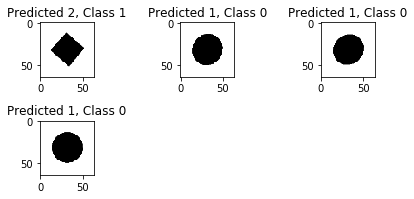

In [184]:

incorrect = np.where(y_pred_partF!=y_test)[0]
print('Found %d incorrect labels' % len(incorrect))
for i, incorrect in enumerate(incorrect[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(64,64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_partF[incorrect], y_test[incorrect]))
    plt.tight_layout()

Has significant errors in when weights are disributed uniformly.

Let's try gaussian

In [188]:
###### Define model ######

model_partF= tf.keras.Sequential([

    #First convolution layer.
    tf.keras.layers.Conv2D( filters=4, kernel_size=(3,3), kernel_initializer='glorot_uniform',activation='relu', input_shape=X_train[1].shape),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25), # here 50% of the output is dropped when passed to next layer in order to avoid overfitting of the data


    #Second convolution layer. For this you can remove input shape. After first convolution layer you don't need input_shape
    tf.keras.layers.Conv2D( filters=8, kernel_size=(3,3), activation='relu'),
    #Adding maxpool to reduce overhead
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25), # here 50% of the output is dropped when passed to next layer in order to avoid overfitting of the data

    # Add a flattening layer
    tf.keras.layers.Flatten(),

    #Add a dense layer
   tf.keras.layers.Dense(units=64, activation='relu'),

    #Adding a final output layer
    tf.keras.layers.Dense(units=4, activation='softmax')
    
])

print(model_partF.summary())

###### Compile model ######
model_partF.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

###### Fit model ######
history_partF= model_partF.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test))

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 62, 62, 4)         40        
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 31, 31, 4)         0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 31, 31, 4)         16        
_________________________________________________________________
dropout_39 (Dropout)         (None, 31, 31, 4)         0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 29, 29, 8)         296       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 14, 14, 8)       

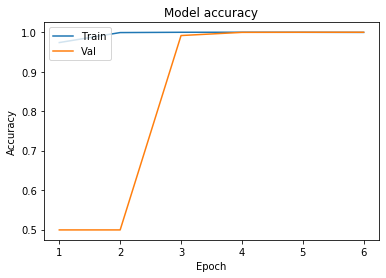

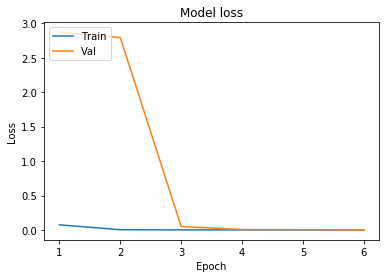

In [189]:
###### Plot Metrics Of Mode ######
epoch_range= range(1,7)
plt.plot(epoch_range, history_partF.history['accuracy'])
plt.plot(epoch_range, history_partF.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(epoch_range, history_partF.history['loss'])
plt.plot(epoch_range, history_partF.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Evaluation result on Test Data : Loss = 0.001241265813962453, accuracy = 1.0


(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a22b822488>)

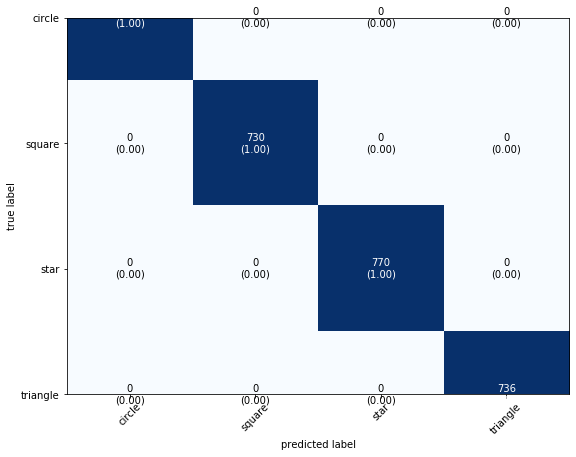

In [190]:
###### Evaluate Model ######
[test_loss, test_acc] = model_partF.evaluate(X_test, y_test, verbose=0)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

###### Predict model ######
y_pred_partF = model_partF.predict_classes(X_test)

cf_matrix_partF = confusion_matrix(y_test, y_pred_partF)

plot_confusion_matrix(cf_matrix_partF,figsize=(9,9), class_names= shapes, show_normed=True)

Found 2994 correct labels
(2994,)


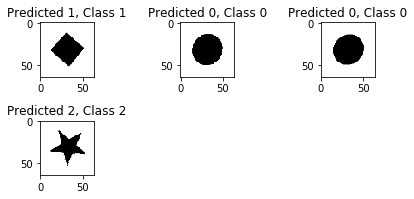

In [191]:
correct = np.where(y_pred_partF==y_test)[0]
print('Found %d correct labels' % len(correct))
for i, correct in enumerate(correct[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(64, 64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_partF[correct], y_test[correct]))
    plt.tight_layout()
    
print(y_test.shape)   

In [192]:

incorrect = np.where(y_pred_partF!=y_test)[0]
print('Found %d incorrect labels' % len(incorrect))
for i, incorrect in enumerate(incorrect[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(64,64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_partF[incorrect], y_test[incorrect]))
    plt.tight_layout()

Found 0 incorrect labels


Change the network architecture (use at least two). How does it affect the accuracy?
A: Much better improvement in model. compared to just uniform, glorot_uniform performed better.

How does it affect how quickly the network plateaus?

Quantifying loss: The loss of our network measures the cost incurred from incorrect predictions.

Empircal Loss: measures total loss over our entire dataset.
Also knows as **Objective function, Cost function, Empical risk**

# Conclusion

With Dropout the model overcame overfitting. Early-pooling did not help. Though most models have the same architecture, they have different hyperparameters like activation functions, optimizers and pooling layers. The loss value for most models is 1.0 with changes seen when gradient estimate was changed. but not below 0.96. The higher the cost value, poorer the model functions. Thus, the epoch with 20, and activation=relu classified best the different shapes. Changing weight significantly changed the values of accuracy.

# Citations

* https://datascience.stackexchange.com/questions/39042/how-to-use-leakyrelu-as-activation-function-in-sequence-dnn-in-keraswhen-it-per
* https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python
* https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python#cnn
* https://medium.com/@randerson112358/classify-images-using-convolutional-neural-networks-python-a89cecc8c679
* https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
* https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/
* https://datascience.stackexchange.com/questions/10523/guidelines-for-selecting-an-optimizer-for-training-neural-networks
* https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/
* https://www.dlology.com/blog/one-simple-trick-to-train-keras-model-faster-with-batch-normalization/

# Contributions

By own: 45%
External resource: 55%


# The MIT License


Copyright (c)  2020 Seemanthini Jois

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.